<center><h1>Zoo Animal Classification

<center><h3>EDA and Performance Analysis on Zoo Animal Dataset

  

<center><h3> Using both Supervised and Unsupervised Models

<h3>About Dataset:

This dataset consists of 101 animals from a zoo.<br>
There are 16 variables with various traits to describe the animals.<br>
The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

<h3>Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

<h3> Loading the data:

In [2]:
class1 = pd.read_csv("class.csv")
class1

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [3]:
df = pd.read_csv("zoo.csv")
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


<h3> Understanding the data

In [4]:
df.shape

(101, 18)

In [5]:
df.info

<bound method DataFrame.info of     animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs 

In [6]:
df["class_type"].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [7]:
class1["Class_Type"].unique()

array(['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug',
       'Invertebrate'], dtype=object)

Hence we can see that there are 7 different categories that an animal could belong to: Mammal, Bird, Reptile, Fish, Amphibians, Bug and Intvertebrate.

<h2> Data Cleaning

In [8]:
df.drop("animal_name", axis=1, inplace=True)
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
df.isna().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

Hence there are no null values present in the dataset.

In [10]:
df.dtypes

hair          int64
feathers      int64
eggs          int64
milk          int64
airborne      int64
aquatic       int64
predator      int64
toothed       int64
backbone      int64
breathes      int64
venomous      int64
fins          int64
legs          int64
tail          int64
domestic      int64
catsize       int64
class_type    int64
dtype: object

<h2> Correlation Matrix

<Axes: title={'center': 'Correlation Matrix:'}>

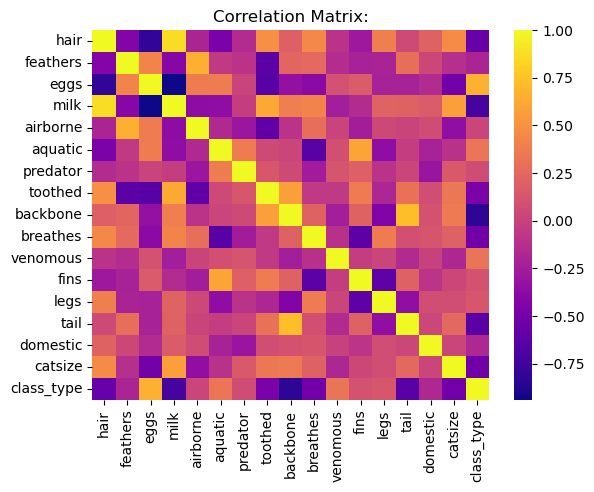

In [11]:
plt.title("Correlation Matrix:")
sns.heatmap(df.corr(), cmap="plasma")

Here we can observe that:<br>
There is a positive correlation between 'aquatic' and 'fins'<br>
There is a negative correlation between 'fins' and 'legs'<br>
There is zero correlation between 'hair' and 'eggs'

<h2> Hypothesis Testing

Null Hypothesis - H0: There is no association between the variables "aquatic" and "fins" in the population.

Alternate Hypothesis - H1: There is an association between the variables "aquatic" and "fins" in the population.


In [12]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['aquatic'], df['fins'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between 'aquatic' and 'fins'.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between 'aquatic' and 'fins'.")

Reject the null hypothesis. There is a significant association between 'aquatic' and 'fins'.


Pearson's Correlation coefficient to prove the hypothesis that there is a negative correlation between the columns 'fins' and 'legs'

In [13]:
from scipy.stats import pearsonr

fins = df['fins']
legs = df['legs']

correlation_coefficient= pearsonr(fins, legs)

print("Pearson correlation coefficient:", correlation_coefficient)

Pearson correlation coefficient: PearsonRResult(statistic=-0.6056518124207462, pvalue=1.9474355077783436e-11)


Hence negative value indicates that there is a negative correlation between the 2 columns hence the hypothesis was proved to be true.

<h2>Visualizing the data

In [14]:
#x = df['class_type'].value_counts().index.tolist()
x=["Mammal", "Bird","Fish", "Invertebrate", "Bug", "Reptile","Amphibian" ]
y = df['class_type'].value_counts().tolist()

In [15]:
x

['Mammal', 'Bird', 'Fish', 'Invertebrate', 'Bug', 'Reptile', 'Amphibian']

In [16]:
y

[41, 20, 13, 10, 8, 5, 4]

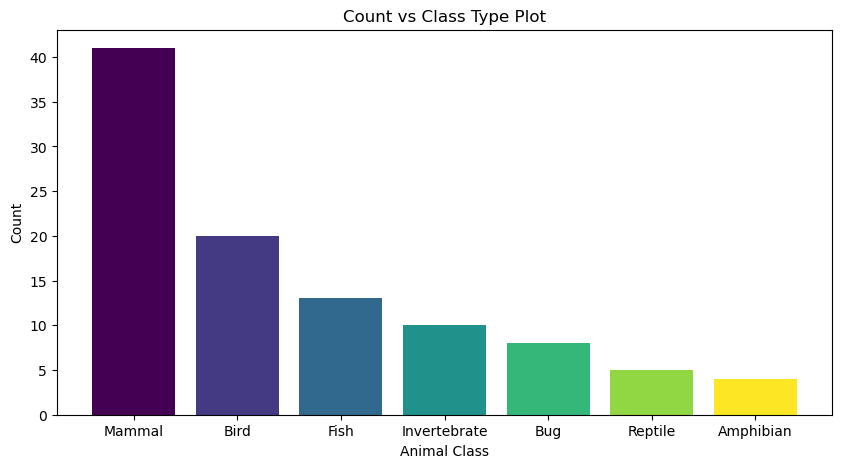

In [17]:
fig = plt.figure(figsize=(10, 5))
plt.bar(x, y, color=plt.cm.viridis(np.linspace(0, 1, len(x))))
plt.xlabel("Animal Class")
plt.ylabel("Count")
plt.title("Count vs Class Type Plot")
plt.show()

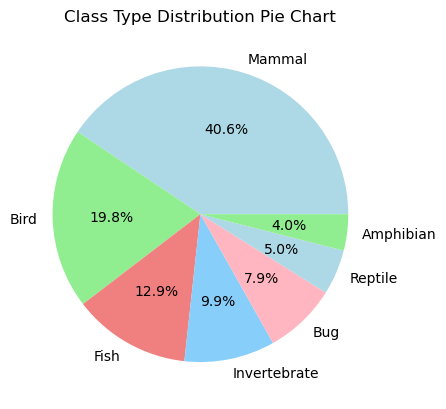

In [18]:
custom_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']

plt.title("Class Type Distribution Pie Chart")
plt.pie(y, labels=x, colors=custom_colors, autopct='%1.1f%%')
plt.show()

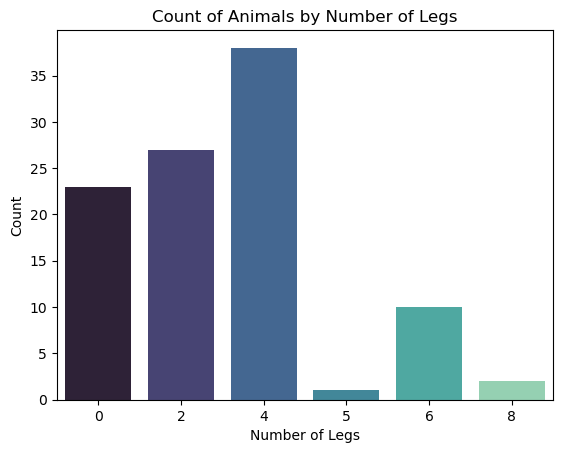

In [19]:
custom_palette = sns.color_palette("mako")
sns.countplot(x=df["legs"], palette=custom_palette)
plt.xlabel("Number of Legs")
plt.ylabel("Count")
plt.title("Count of Animals by Number of Legs")
plt.show()

Hence most of the animals have 4 legs and very few have 5 legs.

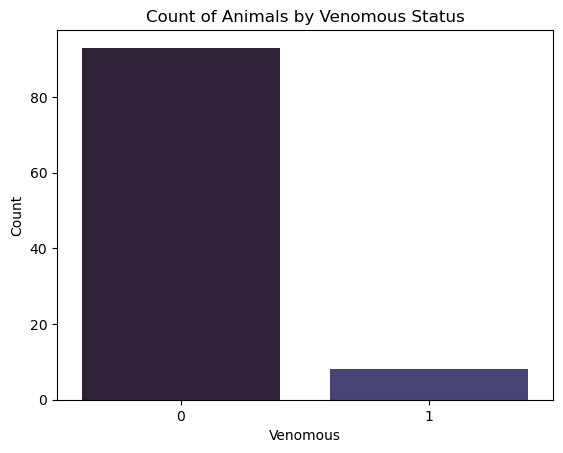

In [20]:
sns.countplot(x=df["venomous"], palette=custom_palette)
plt.xlabel("Venomous")
plt.ylabel("Count")
plt.title("Count of Animals by Venomous Status")
plt.show()

Hence there are few very animals that are venomous.

<h1> Splitting the data into training and test data:

In [21]:
X = df.drop("class_type", axis=1)
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [22]:
y = df["class_type"]
y.head()

0    1
1    1
2    4
3    1
4    1
Name: class_type, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
len(X_train), len(X_test)

(70, 31)

<h1> Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
LinearRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Linear Regression model:",LinearRegressionScore*100)

Accuracy obtained by Linear Regression model: 98.53793164340632


<h1> Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(X_train, y_train)

LogisticRegression()

In [28]:
log_acc = log_model.score(X_test, y_test)
y_pred = log_model.predict(X_test)
print("Accuracy obtained:", log_acc*100)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy obtained: 100.0
Confusion Matrix:
[[15  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  3]]


In [29]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred) 
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



<h1> Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [31]:
naive_acc = classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)

In [32]:
print("Accuracy obtained:", naive_acc*100)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy obtained: 96.7741935483871
Confusion Matrix:
[[15  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  3]]


<h1> Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
dt_acc = classifier.score(X_test, y_test)
y_pred = classifier.predict(X_test)

In [35]:
print("Accuracy obtained:", dt_acc*100)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy obtained: 93.54838709677419
Confusion Matrix:
[[15  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  2  1]
 [ 0  0  0  0  0  0  3]]


<h2> SVM

In [36]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy*100)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 96.7741935483871
Confusion Matrix:
[[15  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  3]]


Hence we can see that Logistic Regression gives the best results

In [37]:
import gradio as gr
import numpy as np

def predict_animal(hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize):
    input_features = np.array([hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize]).reshape(1, -1)
    
    prediction = log_model.predict(input_features)

    animal_categories = {
        1: "Mammal",
        2: "Bird",
        3: "Reptile",
        4: "Fish",
        5: "Amphibians",
        6: "Bug",
        7: "Invertebrate"
    }

    predicted_category = animal_categories.get(prediction[0], "Unknown")

    class_explanations = {
        "Mammal": "Warm-blooded vertebrate with hair or fur, often gives birth to live young.",
        "Bird": "Warm-blooded vertebrate with feathers and beak, lays eggs.",
        "Reptile": "Cold-blooded vertebrate with scales or shells, lays eggs.",
        "Fish": "Cold-blooded aquatic vertebrate with gills and fins.",
        "Amphibians": "Cold-blooded vertebrate that begins life in water and transitions to land.",
        "Bug": "Insect or arachnid with six legs and segmented body.",
        "Invertebrate": "Animal lacking a backbone."
    }

    predicted_explanation = class_explanations.get(predicted_category, "Explanation not available.")

    return predicted_category, predicted_explanation

iface = gr.Interface(
    fn=predict_animal,
    inputs=[
        gr.components.Checkbox(label="Hair"),
        gr.components.Checkbox(label="Feathers"),
        gr.components.Checkbox(label="Eggs"),
        gr.components.Checkbox(label="Milk"),
        gr.components.Checkbox(label="Airborne"),
        gr.components.Checkbox(label="Aquatic"),
        gr.components.Checkbox(label="Predator"),
        gr.components.Checkbox(label="Toothed"),
        gr.components.Checkbox(label="Backbone"),
        gr.components.Checkbox(label="Breathes"),
        gr.components.Checkbox(label="Venomous"),
        gr.components.Checkbox(label="Fins"),
        gr.components.Checkbox(label="Tail"),
        gr.components.Checkbox(label="Domestic"),
        gr.components.Checkbox(label="Catsize"),
        gr.components.Radio(label="Legs", choices=[0, 2, 4, 6, 8, 10])
    ],
    outputs=[
        gr.components.Textbox(label="Predicted Animal Class"),
        gr.components.Textbox(label="Explanation")
    ],
    title="Zoo Animal Classification"
)


iface.launch()


Running on local URL:  http://127.0.0.1:7860

Thanks for being a Gradio user! If you have questions or feedback, please join our Discord server and chat with us: https://discord.gg/feTf9x3ZSB

To create a public link, set `share=True` in `launch()`.


<h2> Feature Engineering - Applying PCA and reducing the number of features to 2

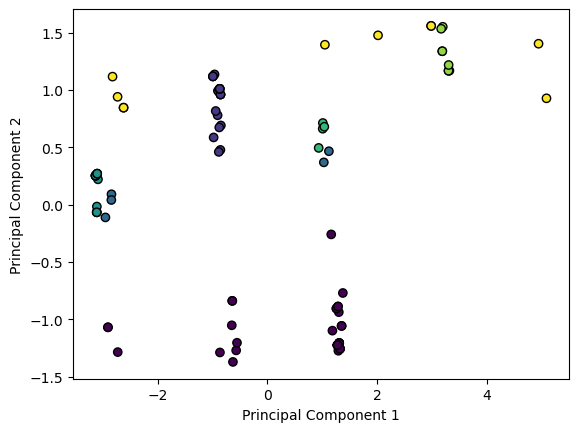

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [39]:
X_pca.shape

(101, 2)

In [40]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)    

<h2>K means clustering

In [41]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans_model.fit_predict(X_pca)
cluster_centers = kmeans_model.cluster_centers_
cluster_labels

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

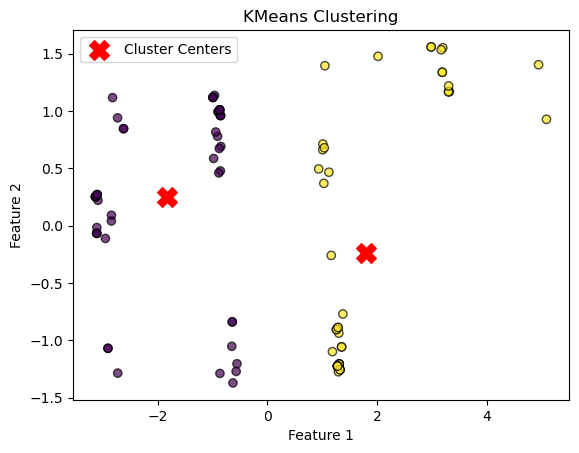

In [42]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

<h2> Mean Shift Clustering

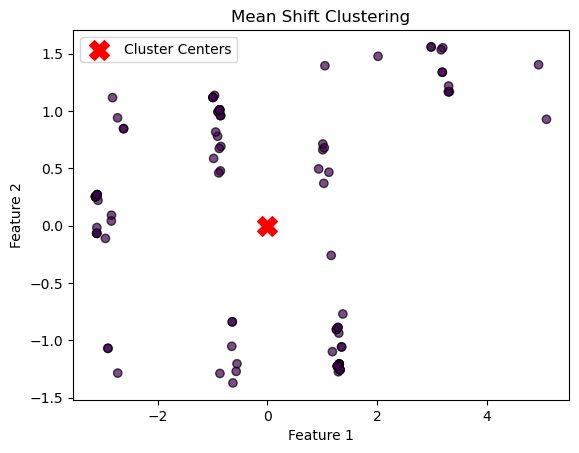

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=1.0, n_samples=len(X_pca))

ms_model = MeanShift(bandwidth=bandwidth)
cluster_labels = ms_model.fit_predict(X_pca)

cluster_centers = ms_model.cluster_centers_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Mean Shift Clustering')
plt.legend()
plt.show()

<h2> Gaussian Mixture Models

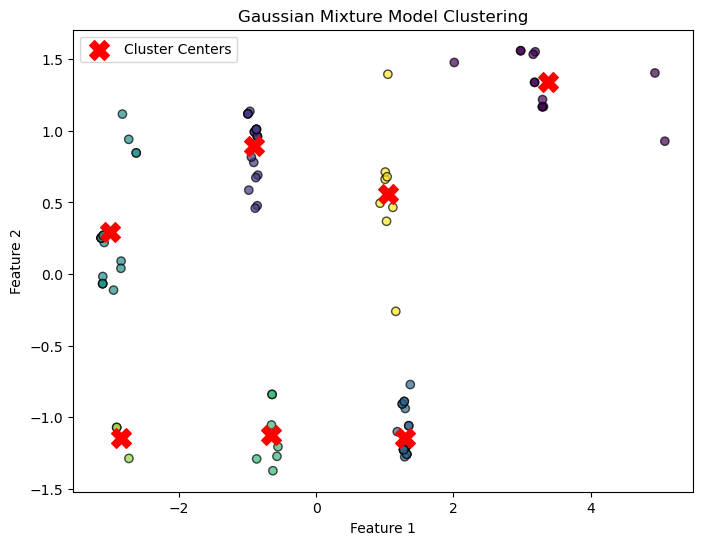

In [44]:
from sklearn.mixture import GaussianMixture

gmm_model = GaussianMixture(n_components=7, random_state=42)
cluster_labels = gmm_model.fit_predict(X_pca)

cluster_centers = gmm_model.means_
cluster_probs = gmm_model.predict_proba(X_pca)

plt.figure(figsize=(8, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', alpha=0.7)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Mixture Model Clustering')
plt.legend()
plt.show()

Hence we can see that after applying GMM, Mean-shift clustering and K-means, GMM gives the best results/clusters.

<h2> Cross Validation and Fine Tuning

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


scoring_metric = 'accuracy'
model = SVC()
cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring=scoring_metric)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring=scoring_metric)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)

final_model = best_model

In [46]:
#Best SVM model
final_model

SVC(C=10, degree=2)

In [47]:
#Test score of best model
test_score*100

96.7741935483871

<h2> Ensemble Learning

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=30, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 96.7741935483871


<h3> Hence best model is supervised Logistic Regression which gave an accuracy of 100%